In [ ]:
import h5py as h5
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.python.ops.resource_variable_ops import ResourceVariable
from tensorflow import keras
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [10]:
###* Load the dataset
dataset = h5.File('..\\..\\data\\features\\positions_GERADO.h5', 'r')
type(dataset)

h5py._hl.files.File

In [11]:
with dataset as h5file:
    data_h5 = []
    labels = []
    for letter in h5file.keys():
        positions = h5file[letter]['positions'][:]
        data_h5.append(positions)
        # print(positions.shape)
        labels.extend([letter]*positions.shape[1]) # extend is used to add the elements of the list, not the list itself  

labels = np.array(labels)
labels_letter = np.reshape(labels, (labels.shape[0], ))
labels_letter.shape


(1194,)

In [12]:
for i, id in enumerate(data_h5):
    print('Data shape',i, id.shape)

Data shape 0 (84, 192)
Data shape 1 (84, 200)
Data shape 2 (84, 200)
Data shape 3 (84, 200)
Data shape 4 (84, 202)
Data shape 5 (84, 200)


#### Remember nx -> 21*4 (positions in x and y)     m -> number of samples

In [13]:
label_encoder = LabelEncoder() ###* LETTERS TO NUMBERS 
labels = label_encoder.fit_transform(labels_letter)
print('The number of classes is:', len(label_encoder.classes_))
labels.shape

The number of classes is: 6


(1194,)

In [14]:
label_encoder.classes_

array(['A', 'D', 'E', 'G', 'O', 'R'], dtype='<U1')

### For every sample m we have one label

In [15]:
data = np.concatenate(data_h5,axis=1)
data.shape

(84, 1194)

#### sklearn needs data.shape = (m, nx), where:
#### m is the number of samples
#### nx number of featues (positions in this case)

In [145]:
data = data.T
data.shape


(1194, 84)

In [146]:
data[0,:]

array([383,  58, 349, 107, 410,  62, 333, 102, 434,  65, 301,  92, 456,
        69, 279,  86, 476,  72, 268,  82, 412,  62, 271,  83, 418,  63,
       251,  77, 418,  63, 277,  85, 414,  62, 283,  87, 393,  59, 273,
        84, 400,  60, 258,  79, 403,  61, 290,  89, 398,  60, 288,  88,
       374,  56, 278,  85, 380,  57, 267,  82, 385,  58, 294,  90, 381,
        57, 292,  90, 355,  53, 286,  88, 361,  54, 276,  85, 369,  55,
       293,  90, 367,  55, 295,  90], dtype=int64)

In [147]:
X_train, X, y_train, Y = train_test_split(data, labels, test_size=0.4)

In [148]:
X_train.shape, y_train.shape, X.shape, Y.shape

((716, 84), (716,), (478, 84), (478,))

#### Now we have our train dataset but we need a dev and test dataset

In [149]:
X_dev, X_test, y_dev, y_test = train_test_split(X, Y, test_size=0.5, )

In [150]:
m = X_train.shape[0] # number of samples
print(f'Traininig set: {X_train.shape[0]} samples')
print(f'Dev set: {X_dev.shape[0]} samples')
print(f'Test set: {X_test.shape[0]} samples')

Traininig set: 716 samples
Dev set: 239 samples
Test set: 239 samples


##### We have 60% for training and 20% for dev,test data
##### Now we need to normalize the data, let's to use the z-score method

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #* Normalize X_train using the mean and standard deviation of the training set
X_dev = scaler.transform(X_dev)  #* Normalize X_test using the mean and standard deviation of the training set
X_test = scaler.transform(X_test)  #* Normalize X_test using the mean and standard deviation of the training set

### ONE HOT to create our matrix with labels

In [152]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_dev_onehot = encoder.transform(y_dev.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))
y_train_onehot.shape, y_dev_onehot.shape, y_test_onehot.shape

c:\Users\hgera\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((716, 6), (239, 6), (239, 6))

In [153]:
# Convertir el array a una serie de pandas
import pandas as pd
y_dev_series = pd.Series(y_dev)

# Contar la frecuencia de cada elemento
element_counts = y_dev_series.value_counts()
print(element_counts)

4    52
5    42
2    41
0    38
1    35
3    31
Name: count, dtype: int64


#### Let's to build our first NEURAL NETWORK

Epoch 1/100


c:\Users\hgera\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.3588 - loss: 2.0625 - val_categorical_accuracy: 0.6151 - val_loss: 1.5600
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7155 - loss: 1.3242 - val_categorical_accuracy: 0.7615 - val_loss: 1.1674
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8318 - loss: 0.9937 - val_categorical_accuracy: 0.8787 - val_loss: 0.8654
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9187 - loss: 0.7419 - val_categorical_accuracy: 0.9331 - val_loss: 0.6735
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9454 - loss: 0.6240 - val_categorical_accuracy: 0.9665 - val_loss: 0.5656
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9747 - loss: 0.5108 - val_categorical_accuracy: 0.9833 - val_loss: 0.5057
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9781 - loss: 0.

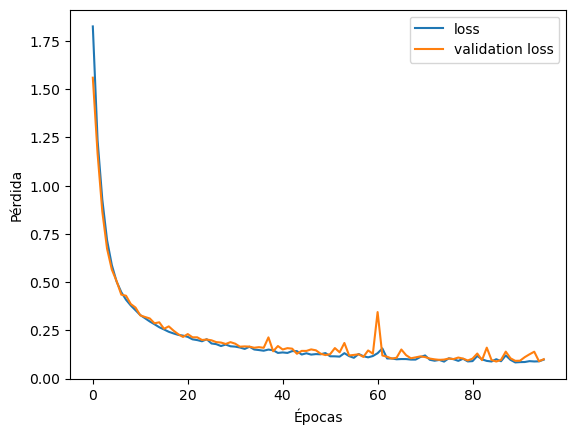

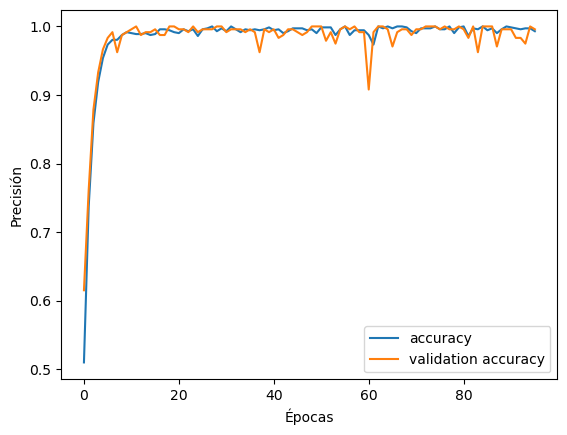

In [154]:
from tensorflow.keras.optimizers import Adam
num_classes = y_train_onehot.shape[1]  # Número de clases

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(84,)),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # tf.keras.layers.Dropout(0.5),  # Dropout con 50% de probabilidad
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Regularización L2
    # tf.keras.layers.Dropout(0.5),  # Otro Dropout con 50% de probabilidad
    # tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Regularización L2
    # tf.keras.layers.Dropout(0.5),  # Otro Dropout con 50% de probabilidad
    # tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Regularización L2
    # tf.keras.layers.Dropout(0.5),  # Otro Dropout con 50% de probabilidad
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Entrenar el modelo
history = model.fit(X_train, y_train_onehot,
                    epochs=100,
                    batch_size=4,
                    validation_data=(X_dev, y_dev_onehot),
                    callbacks=[early_stopping])

# Opcional: Graficar la pérdida y la precisión durante el entrenamiento
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(history.history['categorical_accuracy'], label='accuracy') 
plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [155]:
# Evaluar el modelo
print('***'*50)

test_loss, test_acc = model.evaluate(X_test, y_test_onehot)
print(f'Acuraccy on training data: {test_acc:.2f}')
print(f'Loss on training data: {test_loss:.2f}')


******************************************************************************************************************************************************
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9930 - loss: 0.1476 
Acuraccy on training data: 0.99
Loss on training data: 0.17


In [156]:
#* Save the model
path_save = 'C:\\Users\\hgera\\OneDrive\\Escritorio\\PY4E\\Keet\\First_NN_statics\\GERARDO_MODELO.h5'
model.save(path_save)

### REVISION


In [157]:
model = tf.keras.models.load_model(path_save)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,104 (8.22 KB)

 Trainable params: 2,102 (8.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [158]:
# Supongamos que tienes datos nuevos para predecir
dict_labels = {i: letter for i, letter in enumerate(label_encoder.classes_)}
new_data = data_h5[1][:, 119 ]  # Supongamos que solo tenemos un dato nuevo
new_data = new_data.reshape(1, -1)  # Convertirlo a un arreglo 2D
print(new_data.shape)
# Preprocesar los datos nuevos (normalización, etc.)
new_data_normalized = scaler.transform(new_data)  # Normalización Z-score

# Hacer predicciones
predictions = model.predict(new_data_normalized)

# Convertir las predicciones a etiquetas
predicted_class = np.argmax(predictions, axis=1)

print(f'Predicción: {dict_labels[predicted_class[0]]}')

(1, 84)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicción: D


#### SAVE the values of the normalization

In [159]:
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np


# Guardar el escalador ajustado en un archivo
joblib.dump(scaler, 'scaler.pkl')

print("Escalador ajustado y guardado en 'scaler.pkl'")

Escalador ajustado y guardado en 'scaler.pkl'


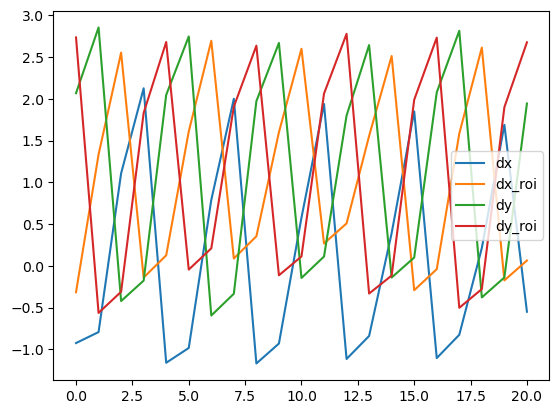

In [160]:
dx = X_train[0,:21]
dx_roi = X_train[0,21:42]
dy = X_train[0,42:42+21]
dy_roi = X_train[0,63:]
plt.plot(dx)
plt.plot(dx_roi)
plt.plot(dy)
plt.plot(dy_roi)
plt.legend(['dx', 'dx_roi', 'dy', 'dy_roi'])
plt.show()